In [2]:
!pip install pycaret
!pip install nltk
import nltk
nltk.download('stopwords')
!pip uninstall lightgbm -y
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 46.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 11.4 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 1

In [8]:
import pandas as pd
from pycaret.classification import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [9]:
df = pd.read_csv("/kaggle/input/financial-news-sentiment-classification/train.csv")
df.sentiment = df.sentiment.replace({'positive':1, 'negative':0}).astype('int')

cv = TfidfVectorizer(lowercase = True, stop_words = stop_words, token_pattern="[A-Za-z]+")
BoW = cv.fit_transform(df['title'])
BoW_df = pd.DataFrame(BoW.toarray(), columns=cv.get_feature_names_out())
BoW_df['cat'] = df.sentiment

In [10]:
setup = setup(BoW_df, target = 'cat', session_id = 1, train_size = 0.8, use_gpu=False, fold = 10)

,Description,Value
0,Session id,1
1,Target,cat
2,Target type,Binary
3,Original data shape,"(10000, 13010)"
4,Transformed data shape,"(10000, 13010)"
5,Transformed train set shape,"(8000, 13010)"
6,Transformed test set shape,"(2000, 13010)"
7,Numeric features,13009
8,Preprocess,True
9,Imputation type,simple


In [11]:
best = compare_models(include = ['lr', 'svm', 'ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9315,0.0000,0.9310,0.9322,0.9315,0.8630,0.8632,4.8210
ridge,Ridge Classifier,0.9309,0.0000,0.9270,0.9344,0.9306,0.8618,0.8619,8.4860
lr,Logistic Regression,0.9130,0.9723,0.8985,0.9255,0.9117,0.8260,0.8265,8.1020


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

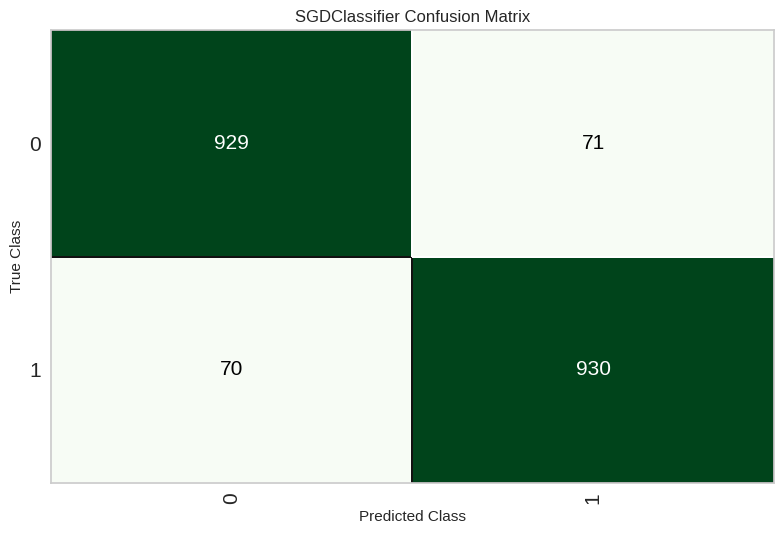

In [12]:
plot_model(best, plot = 'confusion_matrix')

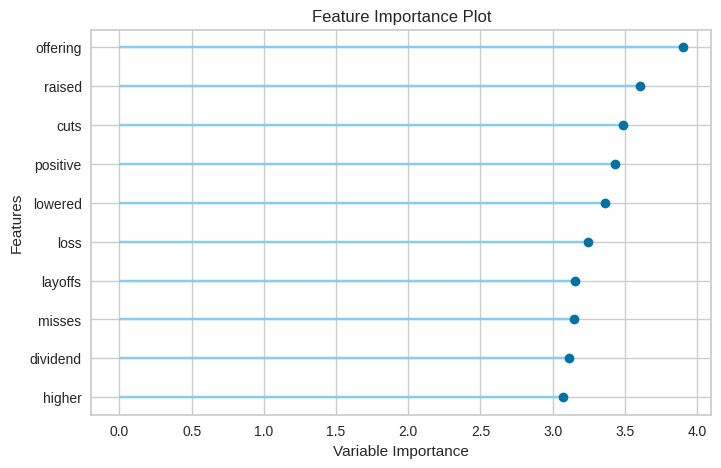

In [13]:
plot_model(best, plot = 'feature')

In [14]:
final = finalize_model(best)

In [15]:
topred = pd.read_csv("/kaggle/input/financial-news-sentiment-classification/test.csv").title
text_transformed = cv.transform(topred)
text_transformed_df = pd.DataFrame(text_transformed.toarray(), columns=cv.get_feature_names_out())
prediction = predict_model(final, text_transformed_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4840,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [16]:
result = pd.DataFrame.from_dict({
    'Id' : [i for i in range(len(prediction.prediction_label))],
    'Predicted': prediction.prediction_label,
})
# result.to_csv("pycaret.csv", index = False)
result

,Id,Predicted
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
1995,1995,1
1996,1996,1
1997,1997,0
1998,1998,1


### Next steps
https://github.com/makcedward/nlpaug/blob/master/example/textual_augmenter.ipynb